## RANDOM FOREST CLASSIFIER ALGORITHM

In [1]:
import pandas as pd
import numpy as np

In [2]:
# Step 1: Load the CSV dataset

Data = pd.read_csv('emotion.csv', usecols=['Text','Emotion'])
Data.head()

,Emotion,Text
0,neutral,Why ?
1,joy,Sage Act upgrade on my to do list for tommorow.
2,sadness,ON THE WAY TO MY HOMEGIRL BABY FUNERAL!!! MAN ...
3,joy,Such an eye ! The true hazel eye-and so brill...
4,joy,@Iluvmiasantos ugh babe.. hugggzzz for u .! b...


In [3]:
Data.tail()

,Emotion,Text
34787,surprise,@MichelGW have you gift! Hope you like it! It'...
34788,joy,The world didnt give it to me..so the world MO...
34789,anger,A man robbed me today .
34790,fear,"Youu call it JEALOUSY, I call it of #Losing YO..."
34791,sadness,"I think about you baby, and I dream about you ..."


In [4]:
Data['Emotion'].value_counts()

Emotion
joy         11045
sadness      6722
fear         5410
anger        4297
surprise     4062
neutral      2254
disgust       856
shame         146
Name: count, dtype: int64

In [5]:
Data = Data.dropna()

In [6]:
Data = Data.drop_duplicates()

In [7]:
import re
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize

In [8]:
# Define preprocess function for text preprocessing

def preprocess_text(text):
    
    # Check for NaN values and handle them
    
    if pd.isnull(text):
        return ""
    
    # Convert to lowercase
    
    text = text.lower()
    
    # Remove special characters and digits
    
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    
    # Tokenization and remove stop words
    
    stop_words = set(stopwords.words('english'))
    
    words = [word for word in word_tokenize(text) if word not in stop_words]
    
    # Stemming
    
    ps = PorterStemmer()
    
    words = [ps.stem(word) for word in words]
    
    # Join the preprocessed words back into a single string
    
    preprocessed_text = ' '.join(words)
    
    return preprocessed_text

In [9]:
# Step 2: Data Preprocessing

Data['Text'] = Data['Text'].apply(preprocess_text)

In [10]:
# Step 3: Feature Extraction (TF-IDF)

from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vectorizer = TfidfVectorizer()
x1 = tfidf_vectorizer.fit_transform(Data['Text'])

In [11]:
# Assuming you have a column named 'label' containing the target labels

y1 = Data['Emotion']

In [12]:
import imblearn
from imblearn.over_sampling import RandomOverSampler
from collections import Counter

ros =RandomOverSampler(random_state=42)
x,y=ros.fit_resample(x1,y1)

print("OUR DATASET COUNT         : ", Counter(y1))
print("OVER SAMPLING DATA COUNT  : ", Counter(y))

OUR DATASET COUNT         :  Counter({'joy': 10464, 'sadness': 6175, 'fear': 4266, 'surprise': 4015, 'anger': 3777, 'neutral': 1466, 'disgust': 855, 'shame': 144})
OVER SAMPLING DATA COUNT  :  Counter({'neutral': 10464, 'joy': 10464, 'sadness': 10464, 'fear': 10464, 'surprise': 10464, 'anger': 10464, 'shame': 10464, 'disgust': 10464})


In [13]:
# Step 5: Splitting Data

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [14]:
from sklearn.ensemble import RandomForestClassifier

In [15]:
# Step 6: Machine Learning Model (Naive Bayes)

RFC = RandomForestClassifier()

In [16]:
# Step 7: Training the Model

RFC.fit(x_train, y_train)

RandomForestClassifier()

In [17]:
# Step 8: Evaluation
predicted = RFC.predict(x_test)

In [18]:
from sklearn.metrics import accuracy_score

AC = accuracy_score(y_test,predicted)

print("THE ACCURACY SCORE OF RANDOM FOREST CLASSIFIER IS :",AC*100)

THE ACCURACY SCORE OF RANDOM FOREST CLASSIFIER IS : 91.6980230544108


In [19]:
from sklearn.metrics import hamming_loss

HL = hamming_loss(y_test,predicted)

print("THE HAMMING LOSS OF RANDOM FOREST CLASSIFIER IS :",HL*100)

THE HAMMING LOSS OF RANDOM FOREST CLASSIFIER IS : 8.301976945589201


In [20]:
from sklearn.metrics import classification_report

CL = classification_report(y_test,predicted)

print('THE CLASSIFICATION REPORT OF RANDOM FOREST CLASSIFIER:\n\n',CL)

THE CLASSIFICATION REPORT OF RANDOM FOREST CLASSIFIER:

               precision    recall  f1-score   support

       anger       0.92      0.93      0.93      2128
     disgust       0.99      1.00      1.00      2073
        fear       0.95      0.92      0.93      2092
         joy       0.77      0.76      0.77      2109
     neutral       0.90      1.00      0.95      2105
     sadness       0.85      0.81      0.83      2065
       shame       1.00      1.00      1.00      2070
    surprise       0.95      0.92      0.93      2101

    accuracy                           0.92     16743
   macro avg       0.92      0.92      0.92     16743
weighted avg       0.92      0.92      0.92     16743



In [21]:
from sklearn.metrics import confusion_matrix

CM = confusion_matrix(y_test,predicted)

print('THE CONFUSION MATRIX SCORE OF RANDOM FOREST CLASSIFIER:\n\n\n',CM)

THE CONFUSION MATRIX SCORE OF RANDOM FOREST CLASSIFIER:


 [[1989    1    8   54   21   51    0    4]
 [   0 2073    0    0    0    0    0    0]
 [  18    2 1917   84   15   44    0   12]
 [  88    3   47 1608  137  171    1   54]
 [   0    3    2    1 2098    1    0    0]
 [  54    2   31  230   47 1673    0   28]
 [   0    0    0    0    0    0 2070    0]
 [  14    3   14  109   12   24    0 1925]]


THE CONFUSION MATRIX SCORE OF RANDOM FOREST CLASSIFIER:


[[1989    1    8   54   21   51    0    4]
 [   0 2073    0    0    0    0    0    0]
 [  18    2 1917   84   15   44    0   12]
 [  88    3   47 1608  137  171    1   54]
 [   0    3    2    1 2098    1    0    0]
 [  54    2   31  230   47 1673    0   28]
 [   0    0    0    0    0    0 2070    0]
 [  14    3   14  109   12   24    0 1925]]


DISPLAY CONFUSION MATRIX OF RANDOM FOREST CLASSIFIER: 




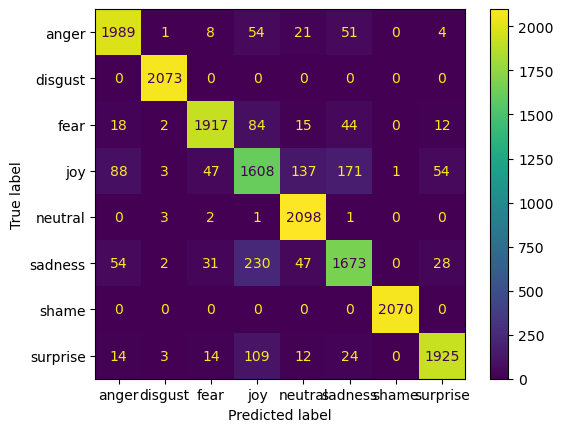

In [22]:
import matplotlib.pyplot as plt

cm=confusion_matrix(y_test, predicted)
print('THE CONFUSION MATRIX SCORE OF RANDOM FOREST CLASSIFIER:\n\n')
print(cm)
print("\n\nDISPLAY CONFUSION MATRIX OF RANDOM FOREST CLASSIFIER: \n\n")

from sklearn.metrics import ConfusionMatrixDisplay

cm = confusion_matrix(y_test, predicted, labels=RFC.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=RFC.classes_)
disp.plot()
plt.show()


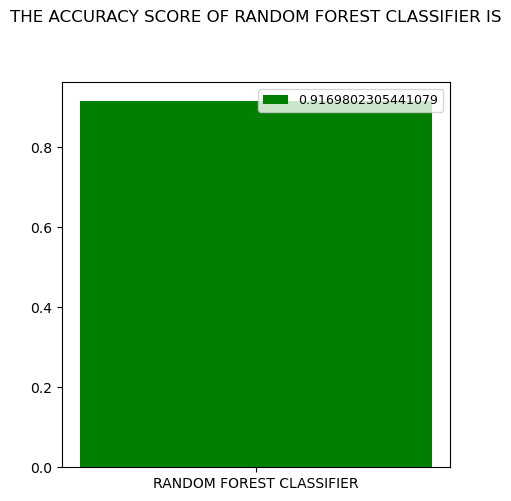

In [23]:
def graph():
    import matplotlib.pyplot as plt
    data=[AC]
    alg="RANDOM FOREST CLASSIFIER"
    plt.figure(figsize=(5,5))
    b=plt.bar(alg,data,color=("GREEN"))
    plt.title("THE ACCURACY SCORE OF RANDOM FOREST CLASSIFIER IS\n\n\n")
    plt.legend(b,data,fontsize=9)
graph()

In [24]:
import joblib
joblib.dump(RFC, 'EMOTION1.pkl')

['EMOTION1.pkl']

In [25]:
import joblib
joblib.dump(tfidf_vectorizer, 'VECTOR1.pkl')

['VECTOR1.pkl']